### For Skewed data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape

(1000, 3)

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [6]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

<Axes: ylabel='placement_exam_marks'>

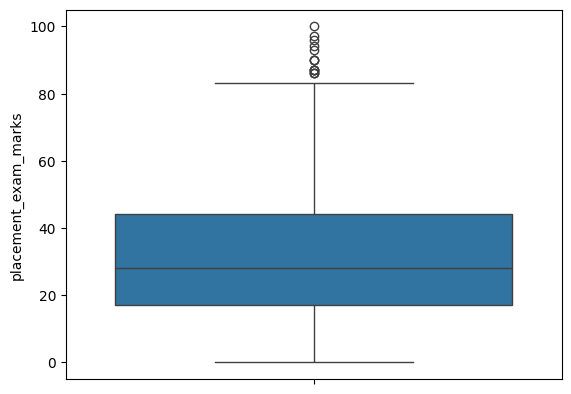

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [12]:
percentile25 ,percentile75

(np.float64(17.0), np.float64(44.0))

In [13]:
iqr = percentile75 - percentile25

In [14]:
iqr

np.float64(27.0)

In [15]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)

In [16]:
upper_limit, lower_limit

(np.float64(84.5), np.float64(-23.5))

#### Finding Outliers

In [17]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


#### Trimming

In [18]:
new_de = df[df['placement_exam_marks']<upper_limit]
new_de.shape


(985, 3)

<Axes: ylabel='placement_exam_marks'>

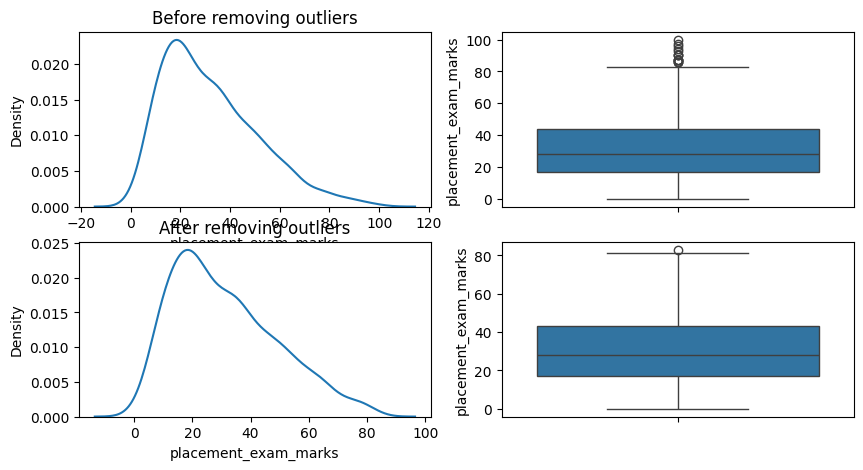

In [23]:
# Compareing boxplot before and after removing outliers
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])
plt.title('Before removing outliers')
plt.subplot(2,2,3)
sns.kdeplot(new_de['placement_exam_marks'])
plt.title('After removing outliers')
plt.subplot(2,2,4)
sns.boxplot(new_de['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

### Clapping

In [24]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks']= np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [25]:
new_df_cap.shape

(1000, 3)

In [27]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [26]:
new_df_cap.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


<Axes: ylabel='placement_exam_marks'>

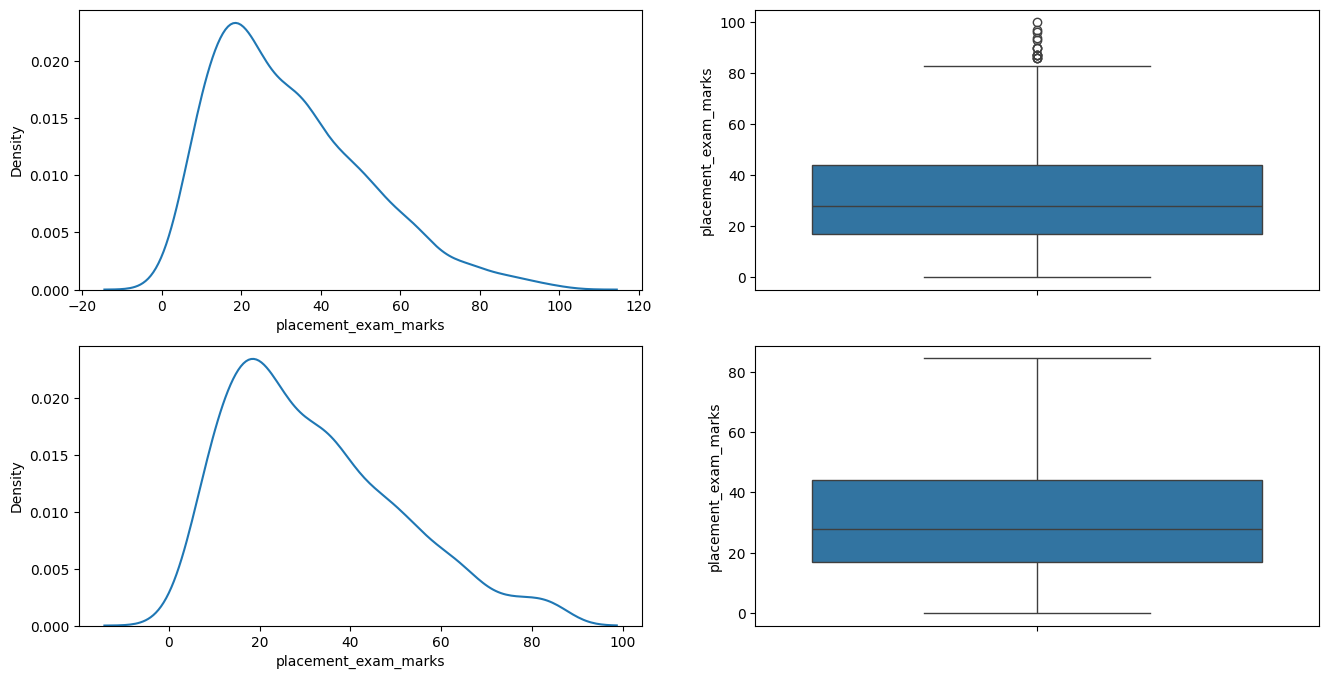

In [28]:
# Comparing
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])